### Create an “Academic performance” dataset of students and perform the following operations using Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values
and/or inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to
decrease the skewness and convert the distribution into a normal distribution.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
from sklearn.preprocessing import StandardScaler

In [2]:
stud_data = pd.read_csv('Student_Performance_Data_Wide_Version.csv')
stud_data.head()

,Student_ID,Semster_Name,Paper 1,Paper 2,Paper 3,Paper 4,Paper 5,Paper 6,Paper 7
0,SID20131143,Sem_1,44.0,74.0,80.0,44.0,95.0,61.0,90.0
1,SID20131143,Sem_2,92.0,57.0,91.0,84.0,80.0,66.0,54.0
2,SID20131143,Sem_3,76.0,83.0,41.0,80.0,69.0,73.0,66.0
3,SID20131143,Sem_4,78.0,83.0,94.0,NaN,99.0,100.0,91.0
4,SID20131143,Sem_5,92.0,44.0,69.0,60.0,97.0,22.0,86.0


In [3]:
stud_data.describe(include='all')

,Student_ID,Semster_Name,Paper 1,Paper 2,Paper 3,Paper 4,Paper 5,Paper 6,Paper 7
count,30552,30552,29899.000000,29962.000000,29930.000000,29942.000000,29945.000000,29974.000000,29959.000000
unique,3819,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,SID20131143,Sem_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8,3819,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,69.625941,69.481310,69.642132,69.626645,69.583570,69.606325,69.561234
std,NaN,NaN,18.086726,18.112737,18.170831,18.118276,18.097274,18.090767,18.014775
min,NaN,NaN,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
25%,NaN,NaN,55.000000,54.000000,54.000000,54.000000,54.000000,54.000000,55.000000
50%,NaN,NaN,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
75%,NaN,NaN,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000


In [4]:
stud_data.isnull().sum()

Student_ID        0
Semster_Name      0
Paper 1         653
Paper 2         590
Paper 3         622
Paper 4         610
Paper 5         607
Paper 6         578
Paper 7         593
dtype: int64

In [5]:
stud_data = stud_data.dropna(axis=0)
stud_data.isnull().sum()


Student_ID      0
Semster_Name    0
Paper 1         0
Paper 2         0
Paper 3         0
Paper 4         0
Paper 5         0
Paper 6         0
Paper 7         0
dtype: int64

In [6]:
stud_data.describe(include='all')

,Student_ID,Semster_Name,Paper 1,Paper 2,Paper 3,Paper 4,Paper 5,Paper 6,Paper 7
count,26544,26544,26544.000000,26544.000000,26544.000000,26544.000000,26544.000000,26544.000000,26544.000000
unique,3819,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,SID20176566,Sem_7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8,3348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,69.637357,69.511942,69.651635,69.685277,69.555907,69.528142,69.507309
std,NaN,NaN,18.120810,18.121659,18.176258,18.136217,18.130768,18.068501,18.015250
min,NaN,NaN,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
25%,NaN,NaN,55.000000,54.000000,54.000000,54.000000,54.000000,54.000000,55.000000
50%,NaN,NaN,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
75%,NaN,NaN,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000


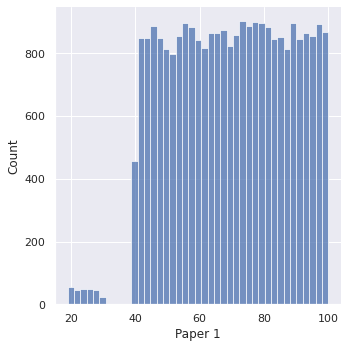

In [7]:
seaborn.displot(stud_data['Paper 1'])

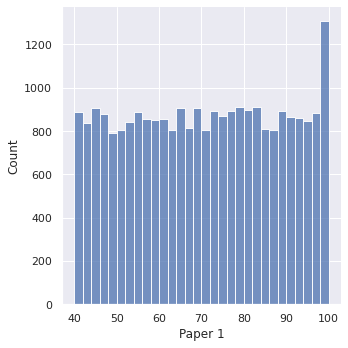

In [8]:
q = stud_data['Paper 1'].quantile(0.01)
stud_data1 = stud_data[stud_data['Paper 1']>q]
seaborn.displot(stud_data1['Paper 1'])


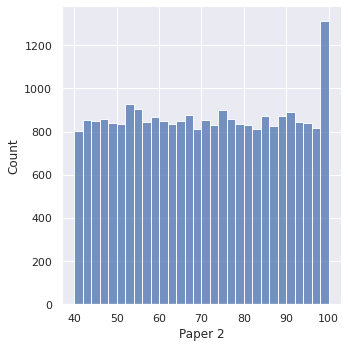

In [9]:
q = stud_data1['Paper 2'].quantile(0.01)
stud_data2 = stud_data1[stud_data1['Paper 2']>q]
seaborn.displot(stud_data2['Paper 2'])

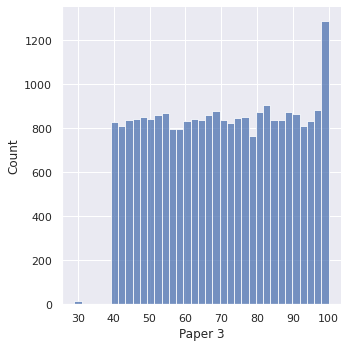

In [10]:
q = stud_data2['Paper 3'].quantile(0.01)
stud_data3 = stud_data2[stud_data2['Paper 3']>q]
seaborn.displot(stud_data3['Paper 3'])

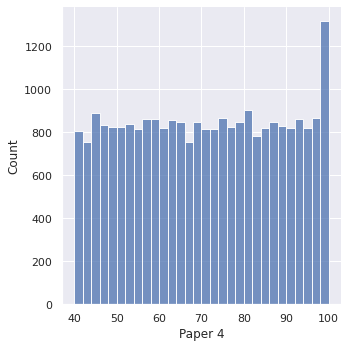

In [11]:
q = stud_data3['Paper 4'].quantile(0.01)
stud_data4 = stud_data3[stud_data3['Paper 4']>q]
seaborn.displot(stud_data4['Paper 4'])

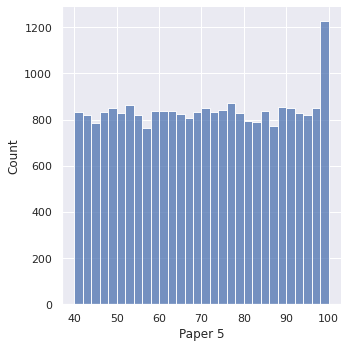

In [12]:
q = stud_data4['Paper 5'].quantile(0.01)
stud_data5 = stud_data4[stud_data4['Paper 5']>q]
seaborn.displot(stud_data5['Paper 5'])

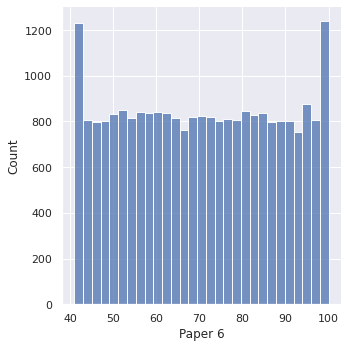

In [13]:
q = stud_data5['Paper 6'].quantile(0.01)
stud_data6 = stud_data5[stud_data5['Paper 6']>q]
seaborn.displot(stud_data6['Paper 6'])

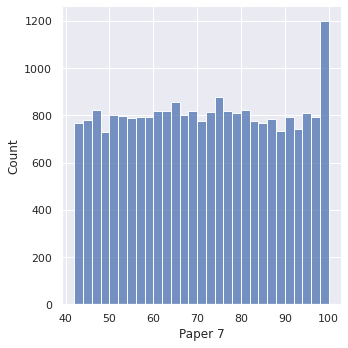

In [14]:
q = stud_data6['Paper 6'].quantile(0.01)
stud_data7= stud_data6[stud_data6['Paper 7']>q]
seaborn.displot(stud_data7['Paper 7'])

In [15]:
stud_data_no_outliers =stud_data7

stud_data_no_outliers=stud_data_no_outliers.drop(['Student_ID','Semster_Name'],axis=1)
stud_data_no_outliers.head()

,Paper 1,Paper 2,Paper 3,Paper 4,Paper 5,Paper 6,Paper 7
0,44.0,74.0,80.0,44.0,95.0,61.0,90.0
1,92.0,57.0,91.0,84.0,80.0,66.0,54.0
2,76.0,83.0,41.0,80.0,69.0,73.0,66.0
5,98.0,84.0,46.0,76.0,54.0,46.0,42.0
6,94.0,53.0,54.0,88.0,86.0,55.0,81.0


In [16]:
stud_data_scaled = StandardScaler().fit_transform(stud_data_no_outliers)
stud_data_scaled

array([[-1.48119948,  0.23028602,  0.55763992, ...,  1.42156172,
        -0.54726927,  1.12475807],
       [ 1.24149957, -0.73737681,  1.1802773 , ...,  0.5693599 ,
        -0.25850935, -1.00338445],
       [ 0.33393322,  0.74257811, -1.64989264, ..., -0.0555881 ,
         0.14575454, -0.29400361],
       ...,
       [ 0.50410191, -0.33892741,  1.1236739 , ...,  1.25112136,
         1.24304223, -0.58957896],
       [-0.29001864, -1.53427561, -1.42347904, ...,  1.59200209,
         0.83877834,  1.42033342],
       [ 0.61754771,  0.79949945, -0.40461786, ..., -0.6805361 ,
         1.24304223, -1.12161459]])